<a href="https://colab.research.google.com/github/Rain1618/Hide-It/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, model_selection, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [2]:
df = pd.read_csv('/content/complete_spacy_HideIt_data.csv')

In [3]:
df = df[df['trigger'].isin(['safe', 'addiction','abuse','sexual violence', 'suicide', 'eating disorder'])] 

In [ ]:
df.head()

In [4]:
X = df['token_text']
y = df['trigger'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
X_train.head()

18210    boredom, what to do have you ever noticed that...
681      alcohol and diet tldr: started to increase cal...
24174    trying not to let it define me i was sexually ...
7103     abuser manipulated me till the end. i went to ...
32295    would not taking oxy lessen the pain alot when...
Name: token_text, dtype: object

In [ ]:
print(X_train.iloc[0])
type(X_train.iloc[0])

boredom, what to do have you ever noticed that when you have nothing pressing to do, the day never ends, but when there is a lot to accomplish the hours fly by?

any advice for boredom busters?


str

In [5]:
classes_names = ['safe', 
                 'addiction', 
                 'abuse', 
                 'sexual violence', 
                 'eating disorder',
                 'suicide']

#TBH, not sure we even need this.....
# encoder = LabelEncoder()
# encoder.fit(classes_names)
# y_train_enc = encoder.fit_transform(y_train)
# y_test_enc = encoder.transform(y_test)

In [6]:
#Tfidf 
Tfidf_vect = TfidfVectorizer(max_features=5000) #500, 1000, 2000, 5000
Tfidf_vect.fit(X)

TfidfVectorizer(max_features=5000)

In the case where you want to save the fitted Tfidf so that you can easily reopen it without needing to refit everything...

In [ ]:
# Save the vectorizer to a file
# with open('5000tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(Tfidf_vect, f)

In [ ]:
with open('5000tfidf_vectorizer.pkl', 'rb') as f:
    Tfidf_vect = pickle.load(f)

In [7]:
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

###Testing difference models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Define a list of models to test
models = {
    'Logistic Regression': LogisticRegression(),
    # 'Decision tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    # 'Random Forest': RandomForestClassifier(),
    # 'MultinminalNB': MultinomialNB(),
    'Linear SVC': svm.LinearSVC(random_state=42)
}

# Iterate over the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f'{model_name}: Accuracy = {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.8522857964347326
Support Vector Machine: Accuracy = 0.8518545140885566
Linear SVC: Accuracy = 0.8591144335825187


In [8]:
model = svm.SVC(probability=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
results = model.predict_proba(X_test)[0]
results

0.8627152988855117


array([8.57766775e-03, 1.09086965e-03, 1.76292722e-04, 9.83657624e-01,
       3.19101715e-03, 3.30652888e-03])

In [9]:
pickle.dump(model, open("SVCv2.sav", 'wb'))

In [ ]:
with open('5000SVC_proba.sav', 'rb') as f:
    model = pickle.load(f)

In [10]:
y_pred = model.predict(X_test)

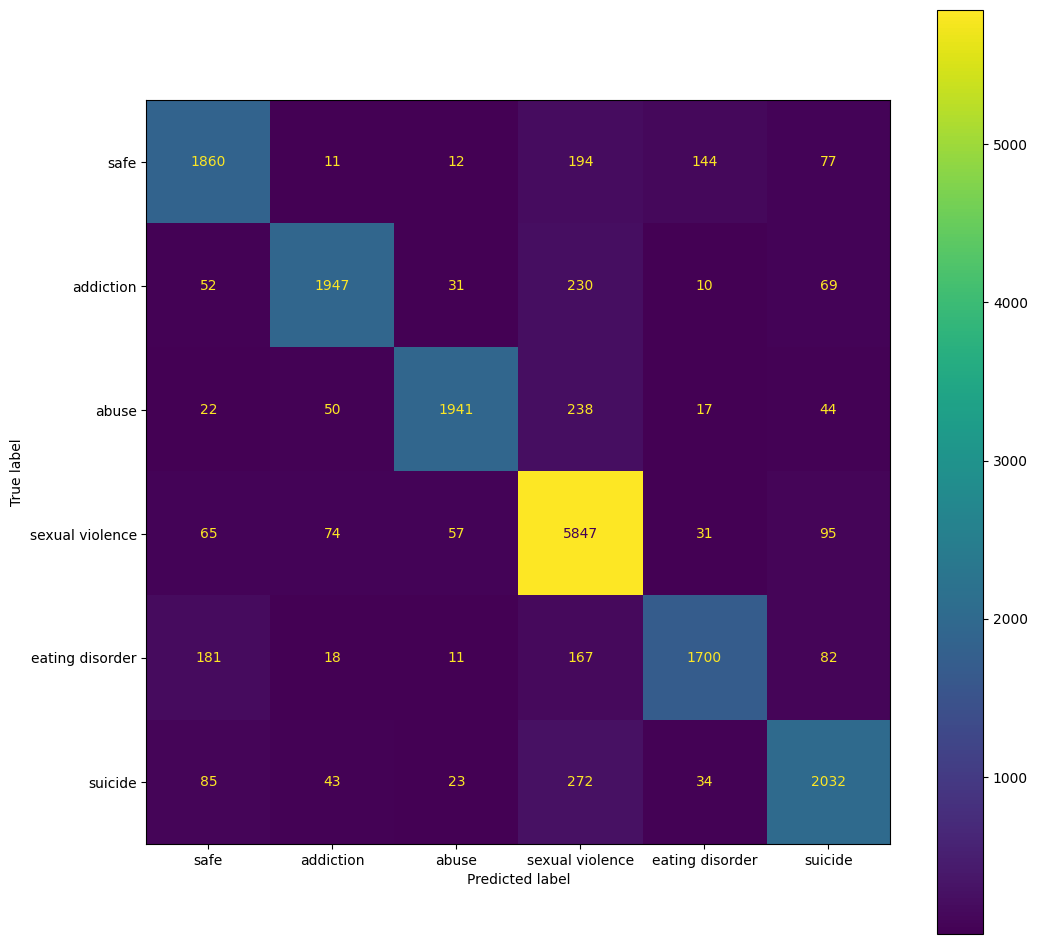

In [11]:
import matplotlib.pyplot as plt
import sklearn 

fig, ax = plt.subplots(figsize=(12, 12))
x=sklearn.metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred),display_labels=classes_names)
x.plot(ax=ax)
plt.show()

In [ ]:
print("Precision Score : ", metrics.precision_score(y_test, y_pred, 
                                           average='micro'))
print("Recall Score : ", metrics.recall_score(y_test, y_pred, 
                                           average='micro'))

Precision Score :  0.851710753306498
Recall Score :  0.851710753306498


In [ ]:
classification_report = metrics.classification_report(y_test, y_pred, target_names=classes_names)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)

NameError: ignored

In [ ]:
scores

array([0.78054624, 0.76707405, 0.76851186, 0.77090822, 0.78049365])

In [ ]:
import pickle
pickle.dump(clf, open("LinearSVC_model.sav", 'wb'))
print('done')

done


In [ ]:
import joblib

# Assuming your trained SVM model is stored in the variable 'svm_model'
joblib.dump(clf, 'LinearSVC_model3.joblib')

['LinearSVC_model3.joblib']

In [ ]:
import joblib
model = joblib.load('/content/LinearSVC_model2.joblib')